# Requerimientos para módulo Transmisor (TX)
### Instituto Tecnologico de Costa Rica
### Escuela de Ingeniería Electrónica
### Curso: Taller de Comunicaciones Eléctricas
### Estudiantes:
- Esteban Arias Rojas
- David Herrera Castro
- David Monge Naranjo
- Federico Rivera Moya


## Bloque Latidos por minuto/Prueba Ecostress

In [1]:
#Se definen los imports necesarios para el código
import pandas as pd
from scipy.stats import anderson
import matplotlib.pyplot as plt
from outliers import smirnov_grubbs as grubbs

In [2]:
# Ruta de los datos
archivo_excel = 'Dataset.xlsx'

# Lee el archivo Excel y crea un DataFrame
data_frame = pd.read_excel(archivo_excel)

# Datos completos
print(data_frame)

tiempo = data_frame.iloc[:, 0]
bpm = data_frame.iloc[:, 1]


     Tiempo(s)         BPM
0            0   90.435881
1           10   91.375558
2           20   93.177147
3           30   92.253070
4           40   93.297168
..         ...         ...
122       1220  127.489200
123       1230  125.722564
124       1240  125.176371
125       1250  124.053356
126       1260  123.681245

[127 rows x 2 columns]


### Prueba de Andersor-Darling
Referencia: https://www.kaggle.com/code/shashwatwork/guide-to-normality-tests-in-python



In [3]:
# Anderson-Darling Test

# Test de normalidad
result = anderson(bpm) # devuelve un objeto que tiene la estadìstica y los valores críticos
print(f'Statistic: {result.statistic:.3f}')

# Interpretación de resultados
for i in range(len(result.critical_values)):
    slevel, cvalues = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'{slevel:.3f}: {cvalues:.3f}, los datos parecen normales (no se rechaza H0)')
    else:
        print(f'{slevel:.3f}: {cvalues:.3f}, los datos no parecen normales (se rechaza H0)')

Statistic: 0.577
15.000: 0.559, los datos no parecen normales (se rechaza H0)
10.000: 0.637, los datos parecen normales (no se rechaza H0)
5.000: 0.764, los datos parecen normales (no se rechaza H0)
2.500: 0.891, los datos parecen normales (no se rechaza H0)
1.000: 1.060, los datos parecen normales (no se rechaza H0)


In [4]:
#Calculo de la media, la varianza y la desviación estandar de los datos
promedio   = bpm.mean()
varianza   = bpm.var()
desviacion = bpm.std()

print(f' El promedio de los datos: {promedio:.4f}')
print(f' La varianza de los datos: {varianza:.4f}')
print(f' La desviación estándar de los datos: {desviacion:.4f}')

 El promedio de los datos: 129.1546
 La varianza de los datos: 389.1577
 La desviación estándar de los datos: 19.7271


### Histograma

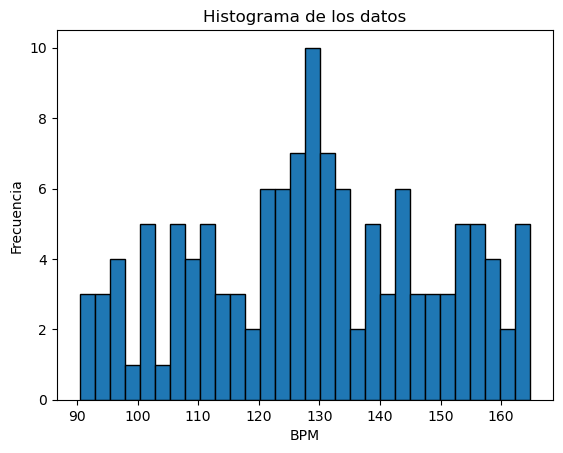

In [5]:
# Crea un histograma
plt.hist(bpm, bins=30, edgecolor='black')  # 'bins' define el número de barras en el histograma
plt.title('Histograma de los datos')
plt.xlabel('BPM')
plt.ylabel('Frecuencia')
plt.show()


### Box Plot

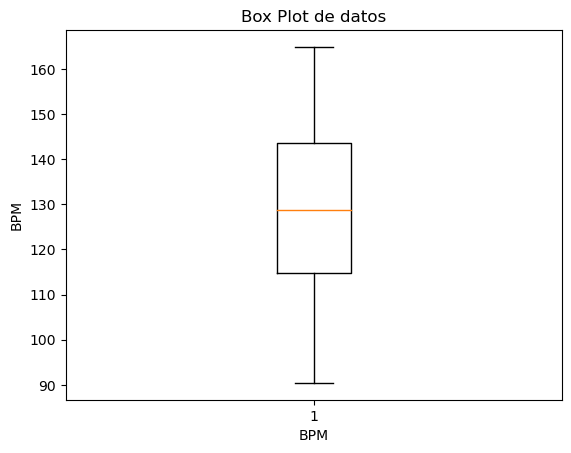

In [6]:
# Crea un box plot
plt.boxplot(bpm)
plt.title('Box Plot de datos')
plt.xlabel('BPM')
plt.ylabel('BPM')
plt.show()

### Test de Grubbs

In [8]:
#Test de Grubbs
bpm_sin_out = grubbs.test(bpm, alpha=.05) #Devulve los datos BPM sin valores atipicos
outliers = bpm[~bpm.isin(bpm_sin_out)]    #Se determinan los valores atípicos
outliers_str = ', '.join(map(str, outliers))

if len(outliers) == 0:
    print("No hay valores atípicos")
else:
    print("Los valores atípicos son:", outliers)


No hay valores atípicos
